<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/validation/camera_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install waymo-open-dataset-tf-2-6-0

In [3]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/validation/camera_box/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))

                                                               key.segment_context_name  \
index                                                                                     
30779396576054160_1880_000_1900_000;15578450726...  30779396576054160_1880_000_1900_000   
30779396576054160_1880_000_1900_000;15578450726...  30779396576054160_1880_000_1900_000   
30779396576054160_1880_000_1900_000;15578450726...  30779396576054160_1880_000_1900_000   
30779396576054160_1880_000_1900_000;15578450726...  30779396576054160_1880_000_1900_000   
30779396576054160_1880_000_1900_000;15578450726...  30779396576054160_1880_000_1900_000   
30779396576054160_1880_000_1900_000;15578450726...  30779396576054160_1880_000_1900_000   
30779396576054160_1880_000_1900_000;15578450726...  30779396576054160_1880_000_1900_000   
30779396576054160_1880_000_1900_000;15578450726...  30779396576054160_1880_000_1900_000   
30779396576054160_1880_000_1900_000;15578450726...  30779396576054160_1880_000_1900_000   

In [4]:
# Get basic statistics for all columns
print(df.describe())

# Get the number of rows and columns in the DataFrame
print(df.shape)

# Count the number of non-null values in each column
print(df.count())



       key.frame_timestamp_micros  key.camera_name  \
count                1.832100e+04     18321.000000   
mean                 1.557845e+15         2.108018   
std                  5.724335e+06         1.297024   
min                  1.557845e+15         1.000000   
25%                  1.557845e+15         1.000000   
50%                  1.557845e+15         2.000000   
75%                  1.557845e+15         3.000000   
max                  1.557845e+15         5.000000   

       [CameraBoxComponent].box.center.x  [CameraBoxComponent].box.center.y  \
count                       18321.000000                       18321.000000   
mean                          965.769262                         606.681894   
std                           505.564913                         175.665355   
min                             1.894770                         207.161520   
25%                           598.707844                         581.062800   
50%                           973.91178

In [ ]:
print(df.columns)

Index(['key.segment_context_name', 'key.frame_timestamp_micros',
       'key.camera_name', 'key.camera_object_id',
       '[CameraBoxComponent].box.center.x',
       '[CameraBoxComponent].box.center.y', '[CameraBoxComponent].box.size.x',
       '[CameraBoxComponent].box.size.y', '[CameraBoxComponent].type',
       '[CameraBoxComponent].difficulty_level.detection',
       '[CameraBoxComponent].difficulty_level.tracking'],
      dtype='object')


key.segment_context_name                            object
key.frame_timestamp_micros                           int64
key.camera_name                                       int8
key.camera_object_id                                object
[CameraBoxComponent].box.center.x                  float64
[CameraBoxComponent].box.center.y                  float64
[CameraBoxComponent].box.size.x                    float64
[CameraBoxComponent].box.size.y                    float64
[CameraBoxComponent].type                             int8
[CameraBoxComponent].difficulty_level.detection    float64
[CameraBoxComponent].difficulty_level.tracking     float64
dtype: object
Box size statistics:
count    18321.000000
mean       132.240423
std        156.826353
min          2.526360
25%         34.579552
50%         86.527830
75%        163.518654
max       1229.589265
dtype: float64


<Axes: ylabel='Count'>

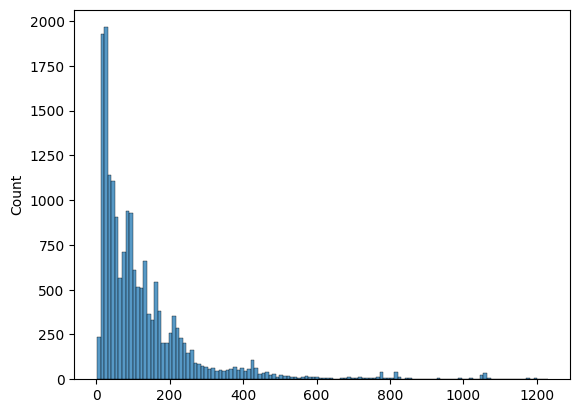

In [ ]:
import pandas as pd
import seaborn as sns

# Load the data from the parquet file
data = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Check the data types of each column
print(data.dtypes)

# Calculate some statistics for the box size
box_size = data[[col for col in data.columns if 'box.size' in col]].mean(axis=1)
print('Box size statistics:')
print(box_size.describe())

# Plot the distribution of box size
sns.histplot(box_size)

In [ ]:
import matplotlib.pyplot as plt

# Define the bounding box coordinates
x = 100  # center x coordinate
y = 200  # center y coordinate
w = 50   # width of the box
h = 100  # height of the box

# Create a blank canvas
fig, ax = plt.subplots()
ax.set_xlim([0, 500])  # set the x-axis limit
ax.set_ylim([0, 500])  # set the y-axis limit

# Draw the rectangle
rect = plt.Rectangle((x - w/2, y - h/2), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Show the plot
plt.show()

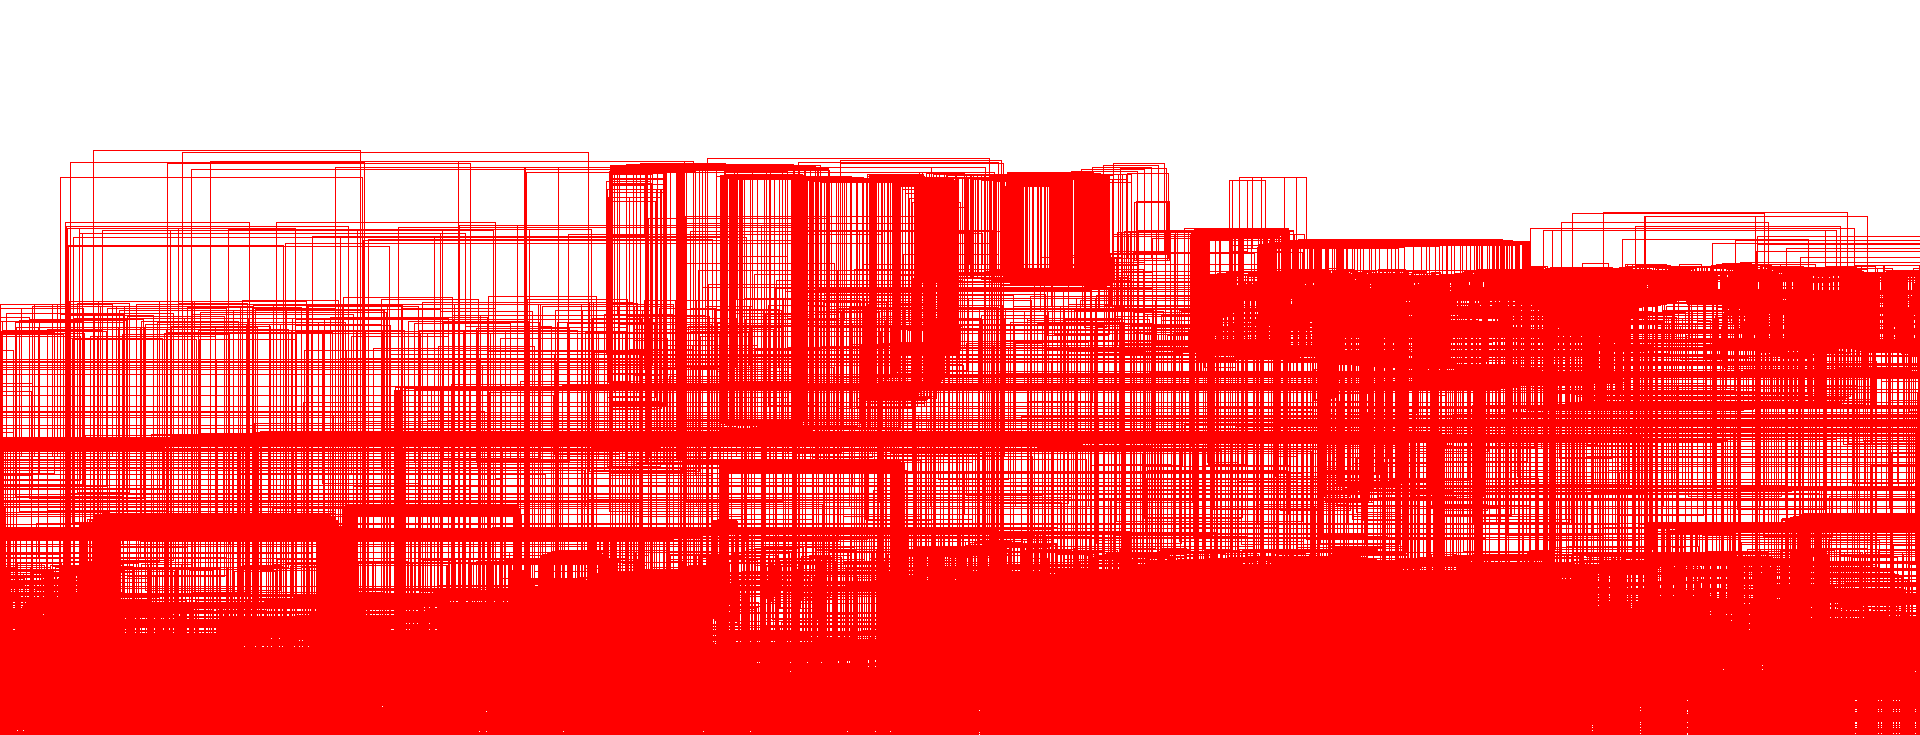

In [5]:
import numpy as np
from PIL import Image, ImageDraw

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[CameraBoxComponent].box.size.x'].max())
height = int(df['[CameraBoxComponent].box.size.y'].max())

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
    # Get the coordinates of the box
    x1 = int(row['[CameraBoxComponent].box.center.x'] - row['[CameraBoxComponent].box.size.x'] / 2)
    y1 = int(row['[CameraBoxComponent].box.center.y'] - row['[CameraBoxComponent].box.size.y'] / 2)
    x2 = int(row['[CameraBoxComponent].box.center.x'] + row['[CameraBoxComponent].box.size.x'] / 2)
    y2 = int(row['[CameraBoxComponent].box.center.y'] + row['[CameraBoxComponent].box.size.y'] / 2)
    
    # Draw the bounding box on the image
    draw.rectangle((x1, y1, x2, y2), outline='red')

# Show the image with bounding boxes
img.show()

In [ ]:
import numpy as np
from PIL import Image, ImageDraw

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[CameraBoxComponent].box.size.x'].max())
height = int(df['[CameraBoxComponent].box.size.y'].max())

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)
# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
    # Check if the frame number matches the desired frame (frame 10 in this example)
    if row['key.frame_timestamp_micros'] == 1:
        # Get the coordinates of the box
        x1 = int(row['[CameraBoxComponent].box.center.x'] - row['[CameraBoxComponent].box.size.x'] / 2)
        y1 = int(row['[CameraBoxComponent].box.center.y'] - row['[CameraBoxComponent].box.size.y'] / 2)
        x2 = int(row['[CameraBoxComponent].box.center.x'] + row['[CameraBoxComponent].box.size.x'] / 2)
        y2 = int(row['[CameraBoxComponent].box.center.y'] + row['[CameraBoxComponent].box.size.y'] / 2)
        
        # Draw the bounding box on the image
        draw.rectangle((x1, y1, x2, y2), outline='red')
# Show the image with bounding boxes
img.show()

In [ ]:
import numpy as np
from PIL import Image, ImageDraw

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[CameraBoxComponent].box.size.x'].max())
height = int(df['[CameraBoxComponent].box.size.y'].max())

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Get the rows for the desired frame
frame_df = df[df['key.frame_timestamp_micros'] == 100000]

# Loop through each bounding box in the data for the desired frame and draw it on the image
for index, row in frame_df.iterrows():
    # Get the coordinates of the box
    x1 = int(row['[CameraBoxComponent].box.center.x'] - row['[CameraBoxComponent].box.size.x'] / 2)
    y1 = int(row['[CameraBoxComponent].box.center.y'] - row['[CameraBoxComponent].box.size.y'] / 2)
    x2 = int(row['[CameraBoxComponent].box.center.x'] + row['[CameraBoxComponent].box.size.x'] / 2)
    y2 = int(row['[CameraBoxComponent].box.center.y'] + row['[CameraBoxComponent].box.size.y'] / 2)
    
    # Draw the bounding box on the image
    draw.rectangle((x1, y1, x2, y2), outline='red')

# Show the image with bounding boxes
img.show()

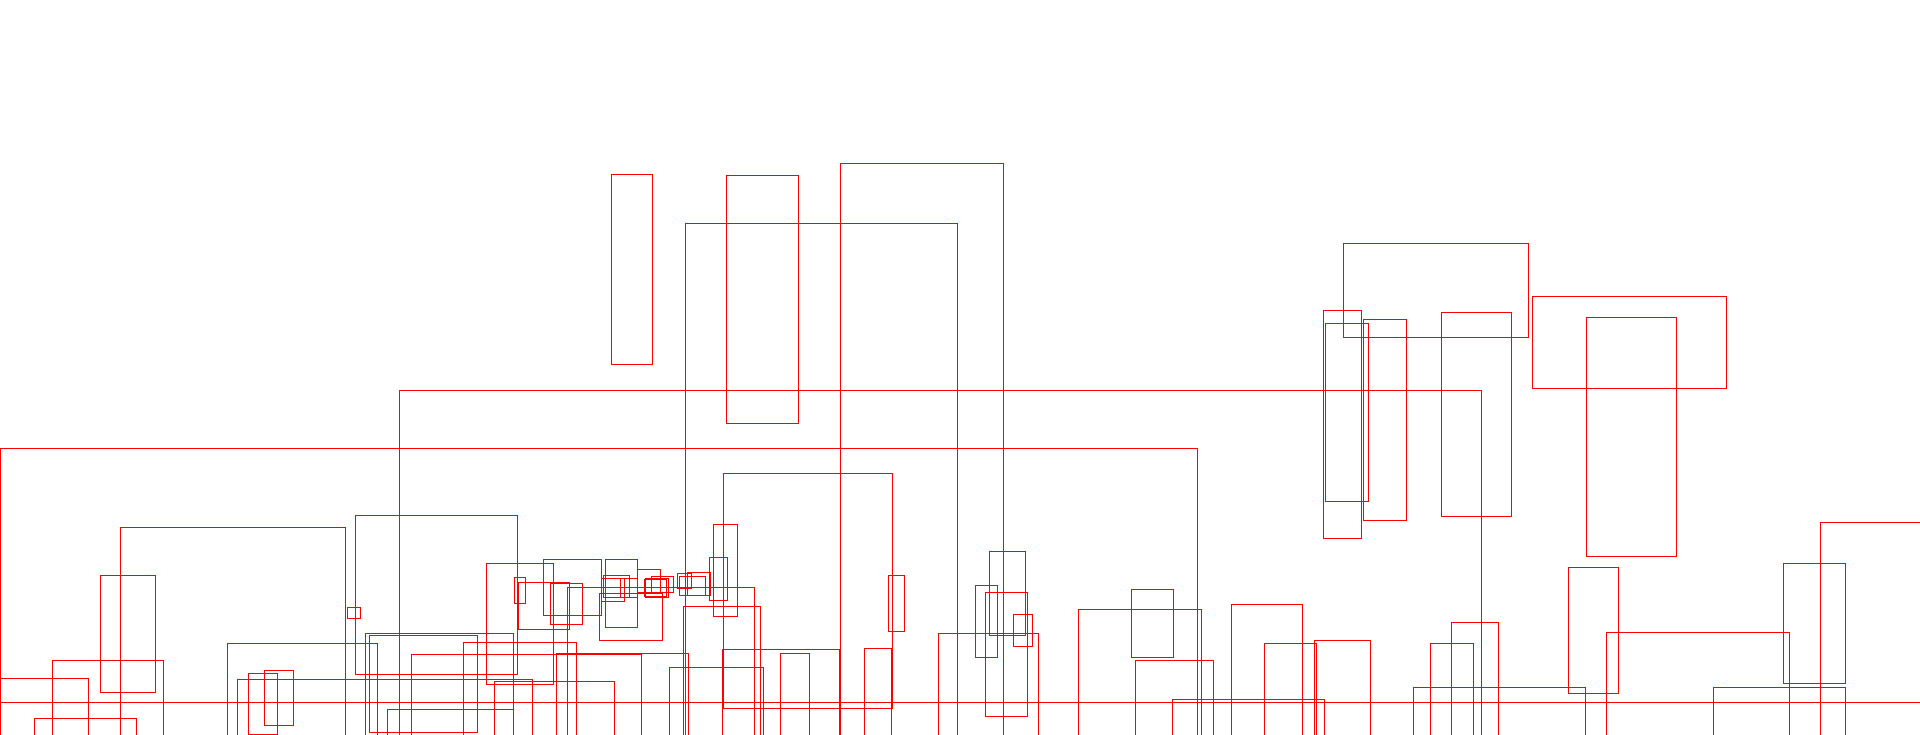

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[CameraBoxComponent].box.size.x'].max())
height = int(df['[CameraBoxComponent].box.size.y'].max())

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
    # Check if the frame number matches the desired frame (frame 1 in this example)
    if row['key.frame_timestamp_micros'] == 1557845072664263 :
        # Get the coordinates of the box
        x1 = int(row['[CameraBoxComponent].box.center.x'] - row['[CameraBoxComponent].box.size.x'] / 2)
        y1 = int(row['[CameraBoxComponent].box.center.y'] - row['[CameraBoxComponent].box.size.y'] / 2)
        x2 = int(row['[CameraBoxComponent].box.center.x'] + row['[CameraBoxComponent].box.size.x'] / 2)
        y2 = int(row['[CameraBoxComponent].box.center.y'] + row['[CameraBoxComponent].box.size.y'] / 2)

        # Draw the bounding box on the image
        draw.rectangle((x1, y1, x2, y2), outline='red')

# Show the image with bounding boxes
img.show()

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[CameraBoxComponent].box.size.x'].max())
height = int(df['[CameraBoxComponent].box.size.y'].max())

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
    # Check if the frame number matches the desired frame (frame 1 in this example)
    if row['key.frame_timestamp_micros'] == 1557845092364266 :
        # Get the coordinates of the box
        x1 = int(row['[CameraBoxComponent].box.center.x'] - row['[CameraBoxComponent].box.size.x'] / 2)
        y1 = int(row['[CameraBoxComponent].box.center.y'] - row['[CameraBoxComponent].box.size.y'] / 2)
        x2 = int(row['[CameraBoxComponent].box.center.x'] + row['[CameraBoxComponent].box.size.x'] / 2)
        y2 = int(row['[CameraBoxComponent].box.center.y'] + row['[CameraBoxComponent].box.size.y'] / 2)

        # Draw the bounding box on the image
        draw.rectangle((x1, y1, x2, y2), outline='red')

# Show the image with bounding boxes
img.show()

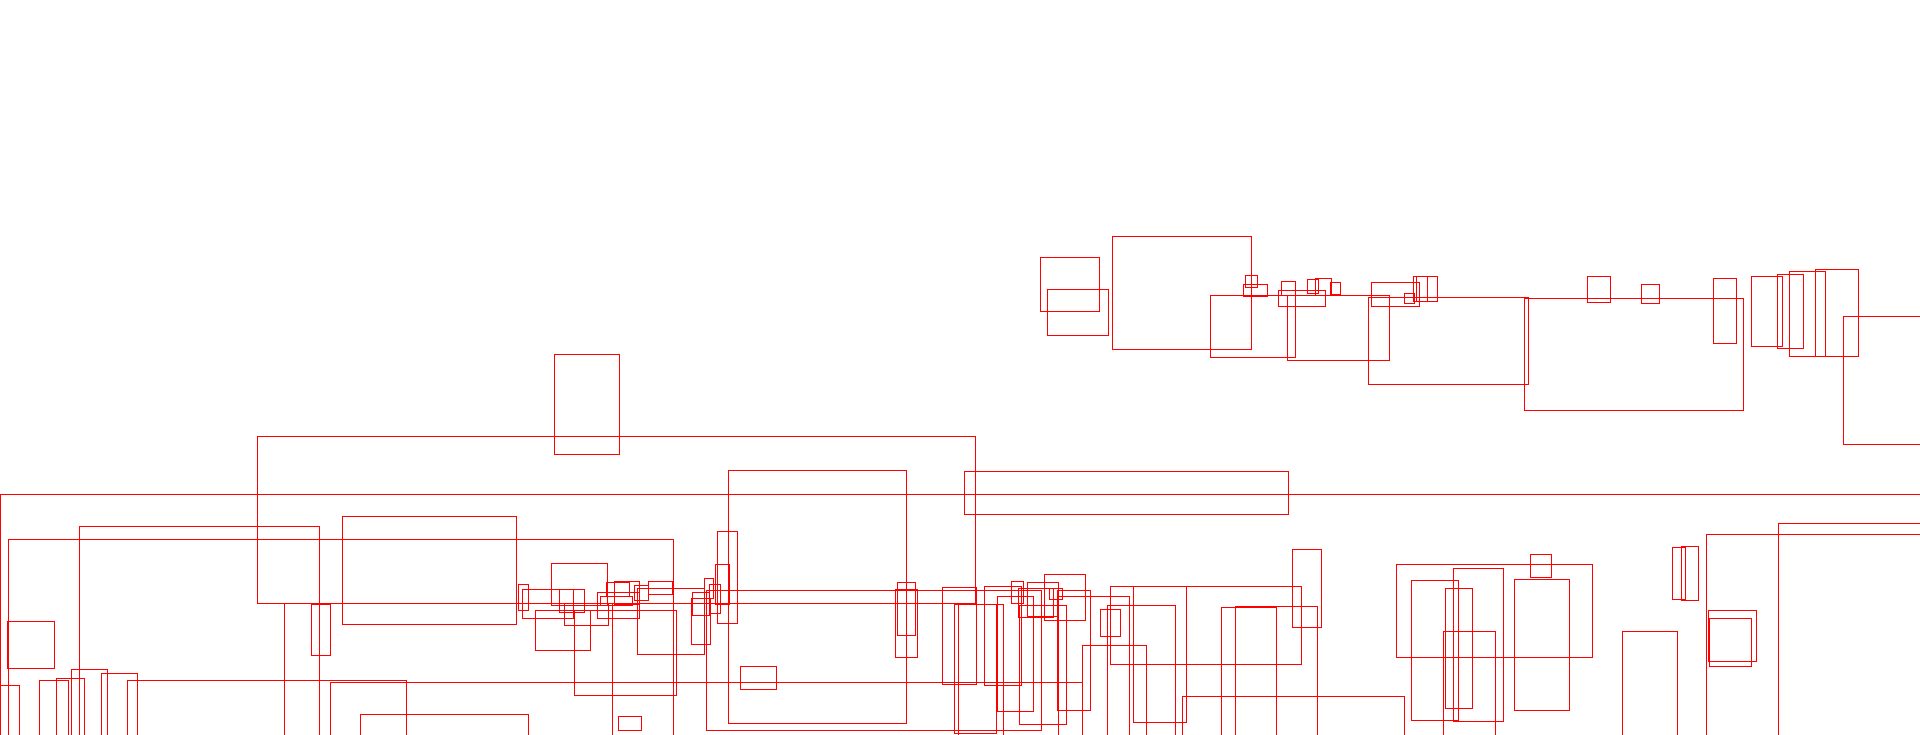

Number of boxes for frame 1557845092364266: 109


In [9]:
import numpy as np
from PIL import Image, ImageDraw
import pandas as pd

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[CameraBoxComponent].box.size.x'].max())
height = int(df['[CameraBoxComponent].box.size.y'].max())

# Set the desired frame timestamp
frame_timestamp = 1557845092364266

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Count the number of boxes for the desired frame timestamp
num_boxes = 0

# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
    if row['key.frame_timestamp_micros'] == frame_timestamp:
        # Get the coordinates of the box
        x1 = int(row['[CameraBoxComponent].box.center.x'] - row['[CameraBoxComponent].box.size.x'] / 2)
        y1 = int(row['[CameraBoxComponent].box.center.y'] - row['[CameraBoxComponent].box.size.y'] / 2)
        x2 = int(row['[CameraBoxComponent].box.center.x'] + row['[CameraBoxComponent].box.size.x'] / 2)
        y2 = int(row['[CameraBoxComponent].box.center.y'] + row['[CameraBoxComponent].box.size.y'] / 2)

        # Draw the bounding box on the image
        draw.rectangle((x1, y1, x2, y2), outline='red')
        
        # Increment the count of boxes
        num_boxes += 1

# Show the image with bounding boxes
img.show()

# Print the number of boxes for the desired frame timestamp
print(f"Number of boxes for frame {frame_timestamp}: {num_boxes}")


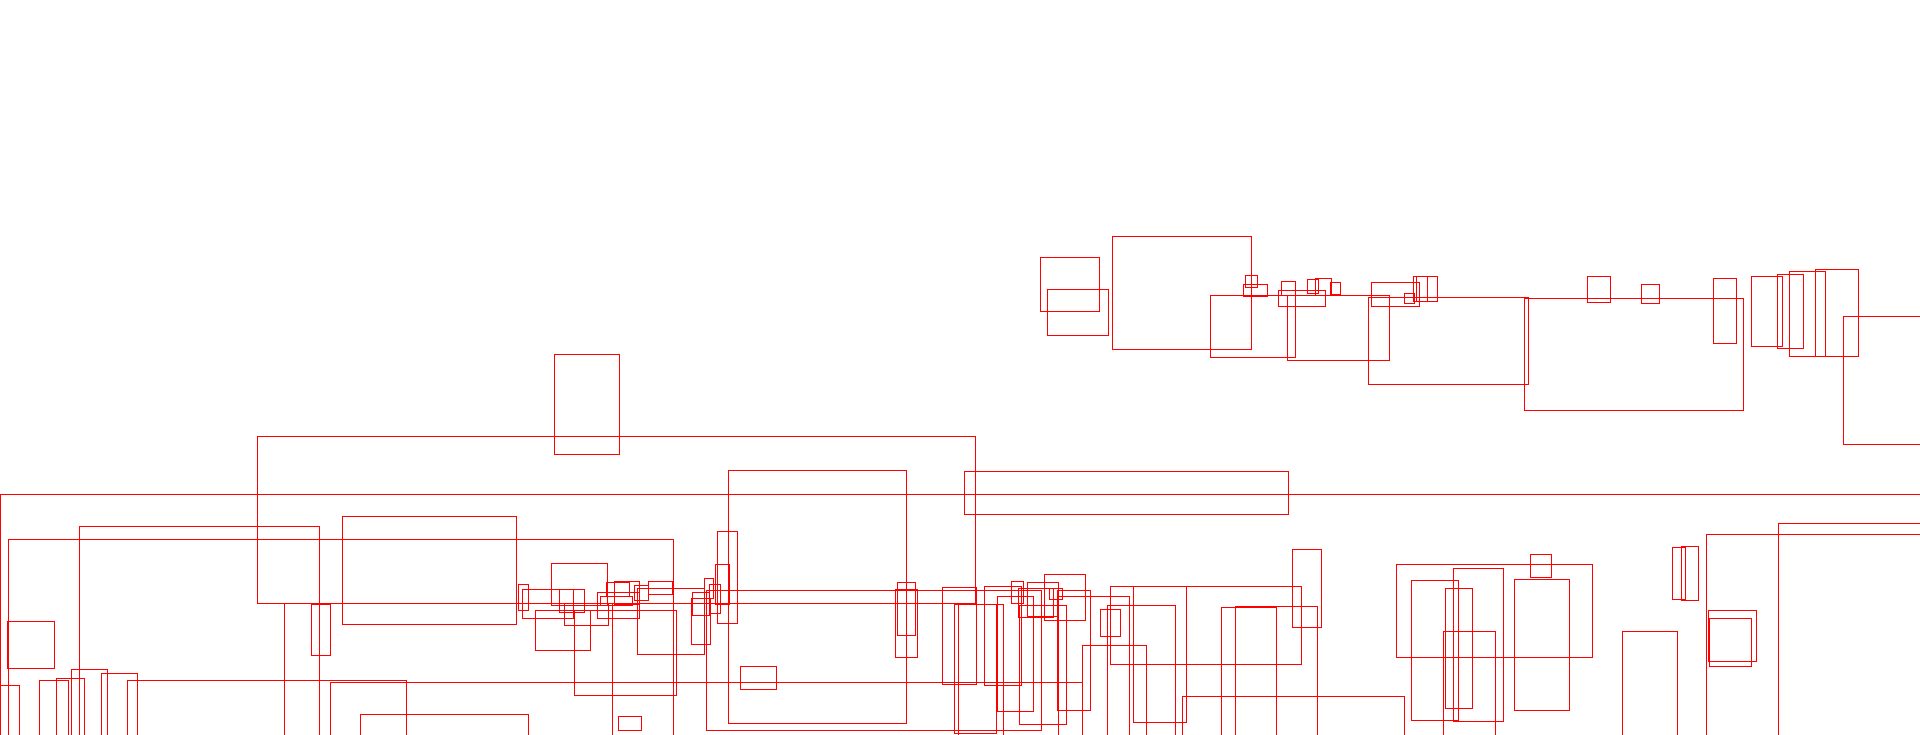

Number of boxes for frame 1557845092364266: 109
Detection difficulty level: nan
Tracking difficulty level: nan
type: 1


In [10]:
import numpy as np
from PIL import Image, ImageDraw
import pandas as pd

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[CameraBoxComponent].box.size.x'].max())
height = int(df['[CameraBoxComponent].box.size.y'].max())

# Set the desired frame timestamp
frame_timestamp = 1557845092364266

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Count the number of boxes for the desired frame timestamp
num_boxes = 0

# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
    if row['key.frame_timestamp_micros'] == frame_timestamp:
        # Get the coordinates of the box
        x1 = int(row['[CameraBoxComponent].box.center.x'] - row['[CameraBoxComponent].box.size.x'] / 2)
        y1 = int(row['[CameraBoxComponent].box.center.y'] - row['[CameraBoxComponent].box.size.y'] / 2)
        x2 = int(row['[CameraBoxComponent].box.center.x'] + row['[CameraBoxComponent].box.size.x'] / 2)
        y2 = int(row['[CameraBoxComponent].box.center.y'] + row['[CameraBoxComponent].box.size.y'] / 2)

        # Draw the bounding box on the image
        draw.rectangle((x1, y1, x2, y2), outline='red')
        
        # Increment the count of boxes
        num_boxes += 1

# Show the image with bounding boxes
img.show()

# Print the number of boxes for the desired frame timestamp
print(f"Number of boxes for frame {frame_timestamp}: {num_boxes}")
# Print the difficulty level of the detection
print(f"Detection difficulty level: {row['[CameraBoxComponent].difficulty_level.detection']}")
print(f"Tracking difficulty level: {row['[CameraBoxComponent].difficulty_level.tracking']}")
print(f"type: {row['[CameraBoxComponent].type']}")


In [ ]:
print(df['[CameraBoxComponent].type'])

index
30779396576054160_1880_000_1900_000;1557845072664263    1
30779396576054160_1880_000_1900_000;1557845072664263    1
30779396576054160_1880_000_1900_000;1557845072664263    2
30779396576054160_1880_000_1900_000;1557845072664263    2
30779396576054160_1880_000_1900_000;1557845072664263    1
                                                       ..
30779396576054160_1880_000_1900_000;1557845092364266    2
30779396576054160_1880_000_1900_000;1557845092364266    2
30779396576054160_1880_000_1900_000;1557845092364266    2
30779396576054160_1880_000_1900_000;1557845092364266    2
30779396576054160_1880_000_1900_000;1557845092364266    1
Name: [CameraBoxComponent].type, Length: 18321, dtype: int8


In [ ]:
print(df['key.frame_timestamp_micros'])

index
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
                                                              ...       
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
Name: key.frame_timestamp_micros, Length: 18321, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw

# Read in the camera_box data from the .parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Print the first 5 rows of the dataframe to inspect the data
print(df.head())

# Extract the x and y coordinates of the center of the boxes
x = df['[CameraBoxComponent].box.center.x'].values
y = df['[CameraBoxComponent].box.center.y'].values

# Extract the width and height of the boxes
width = df['[CameraBoxComponent].box.size.x'].values
height = df['[CameraBoxComponent].box.size.y'].values

# Create a blank image to draw the boxes on
img = Image.new('RGB', (1920, 1080), color='black')

# Create a drawing object
draw = ImageDraw.Draw(img)

# Loop over each box and draw it on the image
for i in range(len(x)):
    x1 = int(x[i] - width[i]/2)
    y1 = int(y[i] - height[i]/2)
    x2 = int(x[i] + width[i]/2)
    y2 = int(y[i] + height[i]/2)
    draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=2)

# Display the image with the boxes drawn on it
img.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Read in the camera_box data from the .parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Extract the x and y coordinates of the center of the boxes
x = df['[CameraBoxComponent].box.center.x'].values
y = df['[CameraBoxComponent].box.center.y'].values

# Extract the width and height of the boxes
width = df['[CameraBoxComponent].box.size.x'].values
height = df['[CameraBoxComponent].box.size.y'].values

# Create a blank image to draw the boxes on
img = np.zeros((1080, 1920, 3), dtype=np.uint8)

# Loop over each box and draw it on the image
for i in range(len(x)):
    x1 = int(x[i] - width[i]/2)
    y1 = int(y[i] - height[i]/2)
    x2 = int(x[i] + width[i]/2)
    y2 = int(y[i] + height[i]/2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the image with the boxes drawn on it
plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
from PIL import Image, ImageDraw

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[CameraBoxComponent].box.size.x'].max())
height = int(df['[CameraBoxComponent].box.size.y'].max())

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
    # Get the coordinates of the box
    x1 = int(row['[CameraBoxComponent].box.center.x'] - row['[CameraBoxComponent].box.size.x'] / 2)
    y1 = int(row['[CameraBoxComponent].box.center.y'] - row['[CameraBoxComponent].box.size.y'] / 2)
    x2 = int(row['[CameraBoxComponent].box.center.x'] + row['[CameraBoxComponent].box.size.x'] / 2)
    y2 = int(row['[CameraBoxComponent].box.center.y'] + row['[CameraBoxComponent].box.size.y'] / 2)
    
    # Draw the bounding box on the image
    draw.rectangle((x1, y1, x2, y2), outline='red')

# Show the image with bounding boxes
img.show()

1


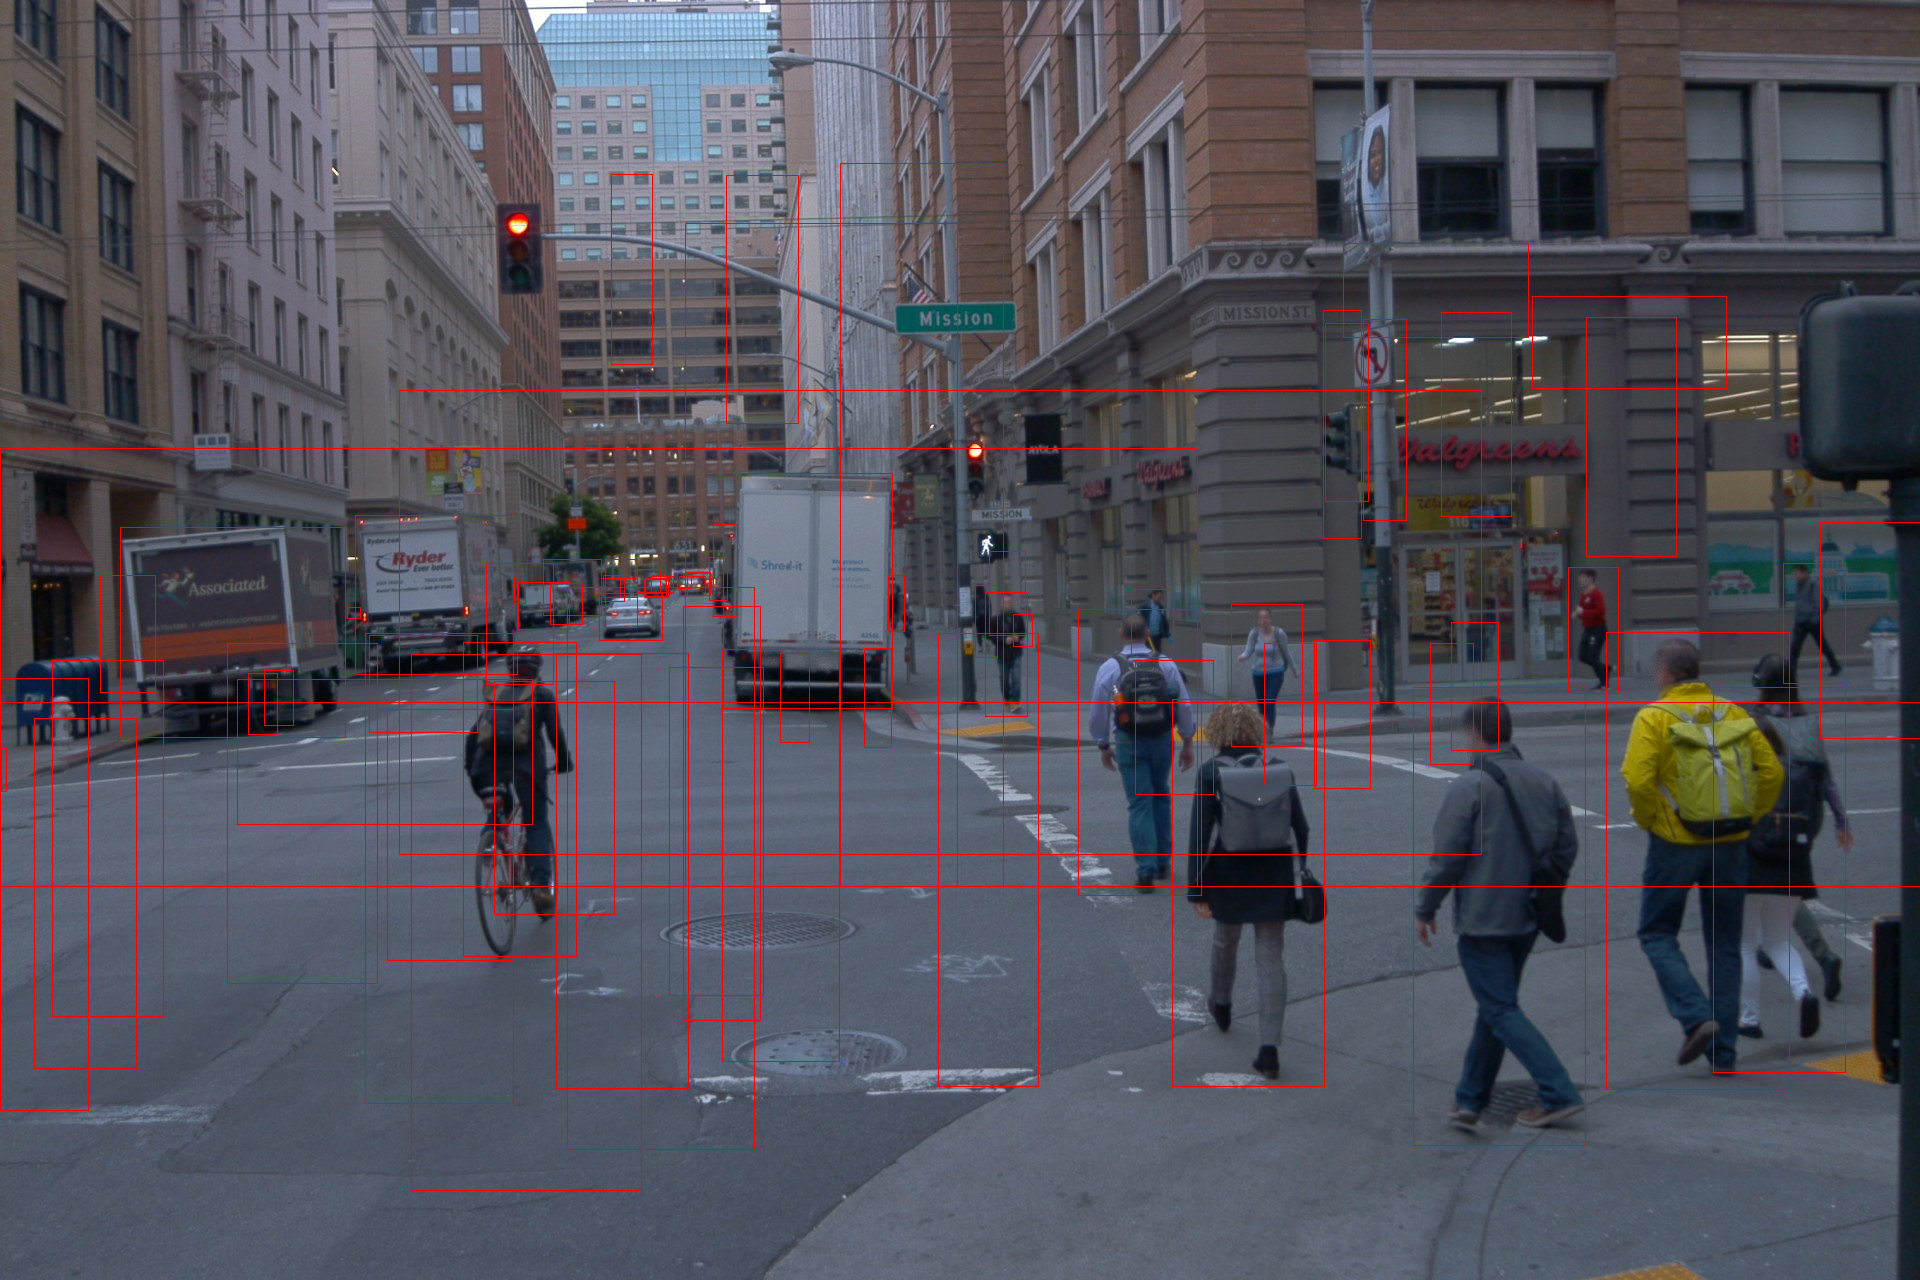

In [18]:
import numpy as np
from PIL import Image, ImageDraw
import pandas as pd
from io import BytesIO

# Load the camera box data from the first parquet file
df_box = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Load the camera image data from the second parquet file
df_image = pd.read_parquet('/content/drive/MyDrive/validation/camera_image/file1.parquet')

# Set the desired frame timestamp
frame_timestamp = 1557845072664263

# Find the row in the camera box DataFrame that corresponds to the desired frame timestamp
df_box_frame = df_box[df_box['key.frame_timestamp_micros'] == frame_timestamp]

# Find the corresponding camera name and object ID
camera_name = df_box_frame['key.camera_name'].values[0]
camera_object_id = df_box_frame['key.camera_object_id'].values[0]
camera_name = df_box_frame['key.camera_name'].values[0]
print(camera_name)


# Find the row in the camera image DataFrame that corresponds to the desired frame timestamp, camera name, and object ID
df_image_frame = df_image[(df_image['key.frame_timestamp_micros'] == frame_timestamp) & (df_image['key.camera_name'] == camera_name)]

# Read the camera image binary data into a stream
img_stream = BytesIO(df_image_frame.iloc[0]['[CameraImageComponent].image'])

# Open the image using PIL
img = Image.open(img_stream)


# Get the camera resolution from the data
width = int(df_box_frame['[CameraBoxComponent].box.size.x'].max())
height = int(df_box_frame['[CameraBoxComponent].box.size.y'].max())

# Draw the bounding boxes on the image
draw = ImageDraw.Draw(img)
for _, row in df_box_frame.iterrows():
    x1 = int(row['[CameraBoxComponent].box.center.x'] - row['[CameraBoxComponent].box.size.x'] / 2)
    y1 = int(row['[CameraBoxComponent].box.center.y'] - row['[CameraBoxComponent].box.size.y'] / 2)
    x2 = int(row['[CameraBoxComponent].box.center.x'] + row['[CameraBoxComponent].box.size.x'] / 2)
    y2 = int(row['[CameraBoxComponent].box.center.y'] + row['[CameraBoxComponent].box.size.y'] / 2)
    draw.rectangle((x1, y1, x2, y2), outline='red')

# Show the image with bounding boxes
img.show()




In [24]:
import numpy as np
from PIL import Image, ImageDraw
import pandas as pd
from io import BytesIO

# Load the camera box data from the first parquet file
df_box = pd.read_parquet('/content/drive/MyDrive/validation/camera_box/file1.parquet')

# Load the camera image data from the second parquet file
df_image = pd.read_parquet('/content/drive/MyDrive/validation/camera_image/file1.parquet')


# Check that the camera names match between the two dataframes
if not df_box['key.camera_name'].equals(df_image['key.camera_name']):
    print("Error: Camera names don't match")

# Check that the timestamps match between the two dataframes
if not df_box['key.frame_timestamp_micros'].equals(df_image['key.frame_timestamp_micros']):
    print("Error: Timestamps don't match")

# Check that there is only one row for each timestamp and camera in both dataframes
grouped_box = df_box.groupby(['key.camera_name', 'key.frame_timestamp_micros']).size()
if not grouped_box[grouped_box > 1].empty:
    print("Error: Multiple rows for same camera and timestamp in df_box")

grouped_image = df_image.groupby(['key.camera_name', 'key.frame_timestamp_micros']).size()
if not grouped_image[grouped_image > 1].empty:
    print("Error: Multiple rows for same camera and timestamp in df_image")








Error: Camera names don't match
Error: Timestamps don't match
Error: Multiple rows for same camera and timestamp in df_box


In [22]:
df_box.drop_duplicates(subset=['key.frame_timestamp_micros', 'key.camera_name'], inplace=True)
df_image.drop_duplicates(subset=['key.frame_timestamp_micros', 'key.camera_name'], inplace=True)